# Benchmarking: Compare different scores with the fingerprint-based similarities

In [1]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

ROOT = os.path.dirname(os.getcwd())
#path_data = os.path.join(ROOT, 'data')
path_data = 'C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\matchms\\data\\'
sys.path.insert(0, ROOT)

### Import reference similarity matrix

In [2]:
filename = os.path.join(path_data,'similarities_daylight2048_jaccard.npy')
matrix_similarities_fingerprint_daylight = np.load(filename)

In [3]:
np.any(np.isnan(matrix_similarities_fingerprint_daylight))

True

### Import already computed similarity matrix: Cosine Score

In [4]:
filename = os.path.join(path_data,'similarities_cosine_tol0005_200708.npy')
matrix_similarities_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_cosine_tol0005_200708_matches.npy')
matrix_matches_cosine = np.load(filename)

print("Matrix dimension", matrix_matches_cosine.shape)

Matrix dimension (12797, 12797)


In [195]:
(12797 * 12797 - 12797 ) * 0.001 /2

81875.206

In [4]:
from custom_functions.plotting_functions import plot_precentile

In [6]:
# Only consider values for mininum 6 matching peaks
matrix_similarities_cosine_minmatch6 = matrix_similarities_cosine.copy()
matrix_similarities_cosine_minmatch6[matrix_matches_cosine < 6] = 0

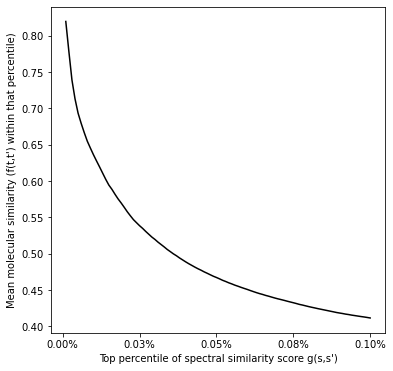

In [7]:
percentile_cosine_tol0005 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                            matrix_similarities_cosine_minmatch6,
                                            num_bins=100, show_top_percentile=0.1,
                                            ignore_diagonal=True)

### Import already computed similarity matrix: Modified cosine score

In [8]:
filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727.npy')
matrix_similarities_mod_cosine = np.load(filename)

filename = os.path.join(path_data,'similarities_mod_cosine_tol0005_200727_matches.npy')
matrix_matches_mod_cosine = np.load(filename)

In [9]:
# Only consider values for mininum 10 matching peaks
matrix_similarities_mod_cosine_minmatch10 = matrix_similarities_mod_cosine.copy()
matrix_similarities_mod_cosine_minmatch10[matrix_matches_mod_cosine < 10] = 0

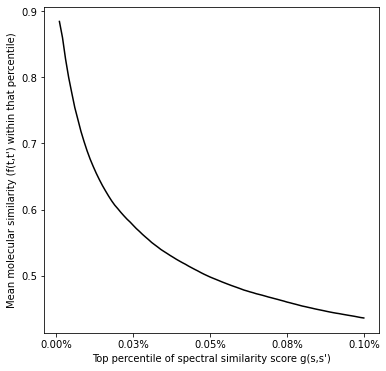

In [10]:
percentile_mod_cosine_tol0005 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                            matrix_similarities_mod_cosine_minmatch10,
                                            num_bins=100, show_top_percentile=0.1,
                                            ignore_diagonal=True)

## Compare spec2vec with reference fingerprint scores

In [11]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_UniqueInchikeys_iter_50.npy')
matrix_similarities_spec2vec = np.load(filename)

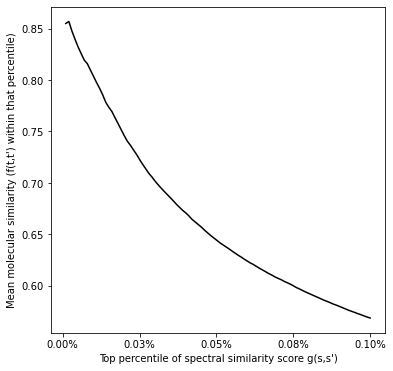

In [12]:
percentile_spec2vec_2dec_iter_50 = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                   matrix_similarities_spec2vec,
                                                   num_bins=100, show_top_percentile=0.1,
                                                   ignore_diagonal=True)

## Compare spec2vec (trained on AllPositive) with reference fingerprint scores

In [13]:
filename = os.path.join(path_data, "percentile_spec2vec_2dec_AllPosModel_iter_15.npy")
percentiles_AllPosModel = np.load(filename)

In [5]:
filename = os.path.join(path_data,'similarities_spec2vec_2dec_AllPositiveModel_15iter_201101.npy')
matrix_similarities_spec2vec_allpositive = np.load(filename)

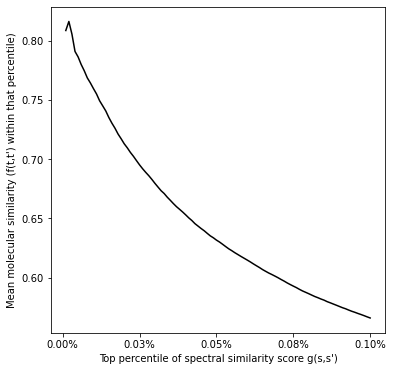

In [6]:
percentile_spec2vec_2dec_AllPos_15iter = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                  matrix_similarities_spec2vec_allpositive,
                                                  num_bins=100, show_top_percentile=0.1,
                                                  ignore_diagonal=True)

In [7]:
# former version model
filename = os.path.join(path_data,'similarities_spec2vec_2dec_AllPositiveModel_15iter_201101.npy')
matrix_similarities_spec2vec_allpositive = np.load(filename)

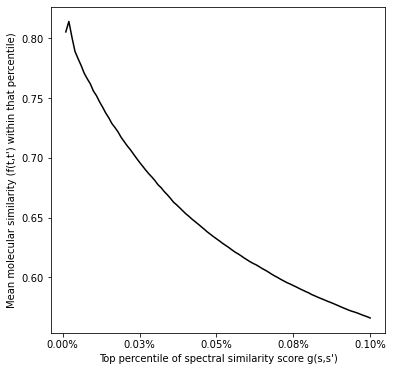

In [7]:
percentile_spec2vec_2dec_AllPos_15iter = plot_precentile(matrix_similarities_fingerprint_daylight,
                                                  matrix_similarities_spec2vec_allpositive,
                                                  num_bins=100, show_top_percentile=0.1,
                                                  ignore_diagonal=True)

## Create plot for manuscript

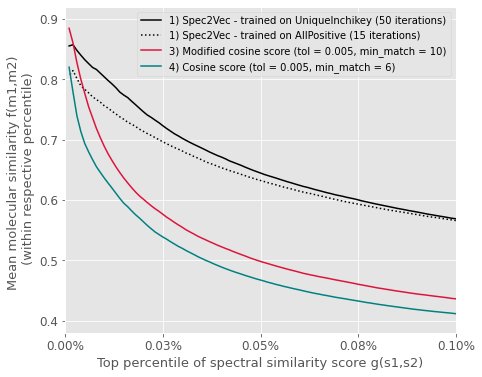

In [18]:
#Compare all:
num_bins = 100
show_top_percentile = 0.1

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_spec2vec_2dec_iter_50, 
         color='black',
         label='1) Spec2Vec - trained on UniqueInchikey (50 iterations)')

plt.plot(x_percentiles, percentiles_AllPosModel, 
         ":", color='black',
         label='1) Spec2Vec - trained on AllPositive (15 iterations)')

plt.plot(x_percentiles, percentile_mod_cosine_tol0005, 
         color='crimson',
         label='3) Modified cosine score (tol = 0.005, min_match = 10)')

plt.plot(x_percentiles, percentile_cosine_tol0005, 
         color='teal', #'gold',
         label='4) Cosine score (tol = 0.005, min_match = 6)')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xticks(np.arange(0, 0.11, step=0.02), ('0.00%', '0.02%', '0.04%', '0.06%', '0.08%', '0.10%'))
plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.xlim(0, 0.1)
plt.ylim(0.38, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_top_percentil_comparison_200728.pdf'))

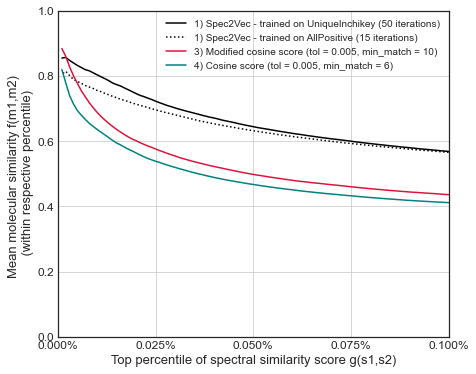

In [14]:
#Compare all:
num_bins = 100
show_top_percentile = 0.1

plt.style.use('seaborn-white') #('ggplot')
fig, ax = plt.subplots(figsize=(7,6))

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

plt.plot(x_percentiles, percentile_spec2vec_2dec_iter_50, 
         color='black',
         label='1) Spec2Vec - trained on UniqueInchikey (50 iterations)')

plt.plot(x_percentiles, percentiles_AllPosModel, 
         ":", color='black',
         label='1) Spec2Vec - trained on AllPositive (15 iterations)')

plt.plot(x_percentiles, percentile_mod_cosine_tol0005, 
         color='crimson',
         label='3) Modified cosine score (tol = 0.005, min_match = 10)')

plt.plot(x_percentiles, percentile_cosine_tol0005, 
         color='teal', #'gold',
         label='4) Cosine score (tol = 0.005, min_match = 6)')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xticks(np.arange(0, 0.11, step=0.02), ('0.00%', '0.02%', '0.04%', '0.06%', '0.08%', '0.10%'))
plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)])
plt.legend()
plt.xlabel("Top percentile of spectral similarity score g(s1,s2)", fontsize=13)
plt.ylabel("Mean molecular similarity f(m1,m2) \n (within respective percentile)", fontsize=13)
plt.grid(True)
plt.xlim(0, 0.1)
plt.ylim(0, 1.0) #(0.38, 0.92)
plt.savefig(os.path.join(path_data, 'Benchmarking_top_percentil_comparison_200922.pdf'))

In [28]:
def prepare_histogram_scores(scores, n_bins):
    """ Create histogram and plot it.
    """
    bins_lst = np.linspace(0, 1, n_bins+1) 
    hist, bin_edges = np.histogram(scores, bins_lst)
    
    return hist, bin_edges


def plot_histogram(hist, bin_edges, figsize=(6,6)):
    n_bins = bin_edges.shape[0] -1
    bins_lst = np.linspace(0, 1, n_bins+1)
    
    plt.style.use('default') #('ggplot')
    plt.figure()
    fig, ax = plt.subplots(figsize=figsize)
    
    bar_width = 0.8 * 1/n_bins
    plt.bar(bin_edges[:-1], 100*hist/np.sum(hist), width = bar_width, color='none', edgecolor='gray', hatch="///", lw=2., zorder = 0)
    plt.bar(bin_edges[:-1], 100*hist/np.sum(hist), width = bar_width, edgecolor='black', linewidth=3, color='none',alpha=1)
    
    maxbar = np.max(100*hist/np.sum(hist))
    plt.yticks(10*np.arange(np.ceil(maxbar/10)), ["{}".format(10*x) for x in np.arange(np.ceil(maxbar/10))], fontsize=12)
    
    bar_labels = ['{:03.1f} - {:03.1f}'.format(bins_lst[i], bins_lst[i+1]) for i in range(n_bins)]
    plt.xticks(bins_lst[:-1], bar_labels, fontsize=12, rotation='vertical')
    plt.xlabel('molecular similarity (Tanimoto)', fontsize=16)
    plt.ylabel('fraction of all scores [%]', fontsize=16)
    plt.setp(ax.spines.values(), linewidth=3, color="black")

# Look at score distributions

<Figure size 640x480 with 0 Axes>

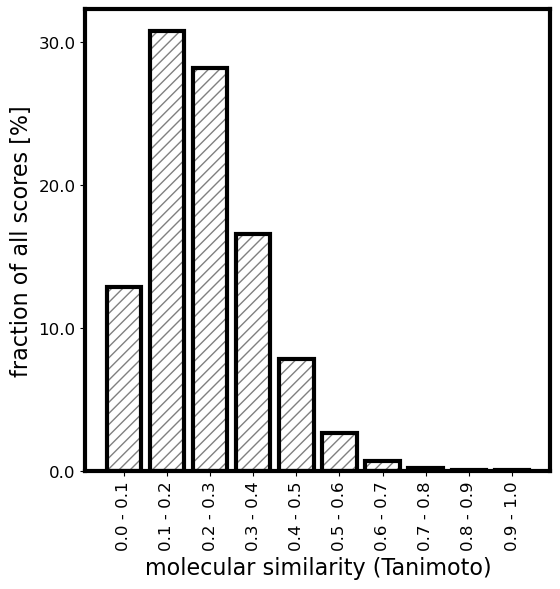

In [29]:
hist, bin_edges = prepare_histogram_scores(matrix_similarities_fingerprint_daylight, 10)
plot_histogram(hist, bin_edges, figsize=(6,6))

<Figure size 640x480 with 0 Axes>

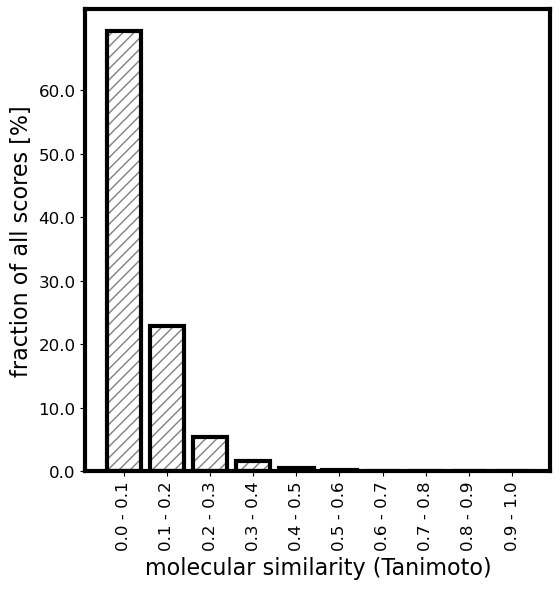

In [30]:
hist_s2v, bin_edges_s2v = prepare_histogram_scores(matrix_similarities_spec2vec, 10)
plot_histogram(hist_s2v, bin_edges_s2v, figsize=(6,6))

In [75]:
# Random guesses would get:

idx_not_nans = np.where(np.isnan(matrix_similarities_fingerprint_daylight) == False)
tanimoto_mean = np.mean(matrix_similarities_fingerprint_daylight[idx_not_nans])

print("Mean Tanimoto score:", tanimoto_mean)

Mean Tanimoto score: 0.23844384645278185


In [71]:
random_guesses = np.random.choice(idx_not_nans[0].shape[0], 100000, replace=False)

In [72]:
random_guesses.shape

(100000,)

In [74]:
np.mean(matrix_similarities_fingerprint_daylight[(idx_not_nans[0][random_guesses],
                                                  idx_not_nans[1][random_guesses])])

0.23849614695078628

<Figure size 640x480 with 0 Axes>

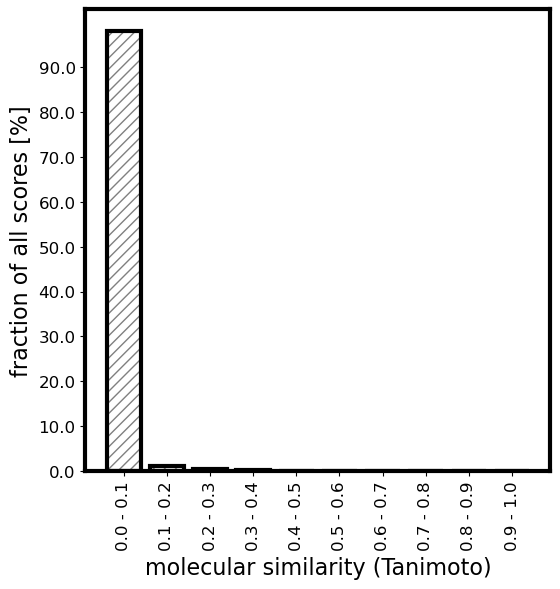

In [31]:
hist_cos, bin_edges_cos = prepare_histogram_scores(matrix_similarities_cosine_minmatch6, 10)
plot_histogram(hist_cos, bin_edges_cos, figsize=(6,6))

In [34]:
bar_width

0.08

<Figure size 640x480 with 0 Axes>

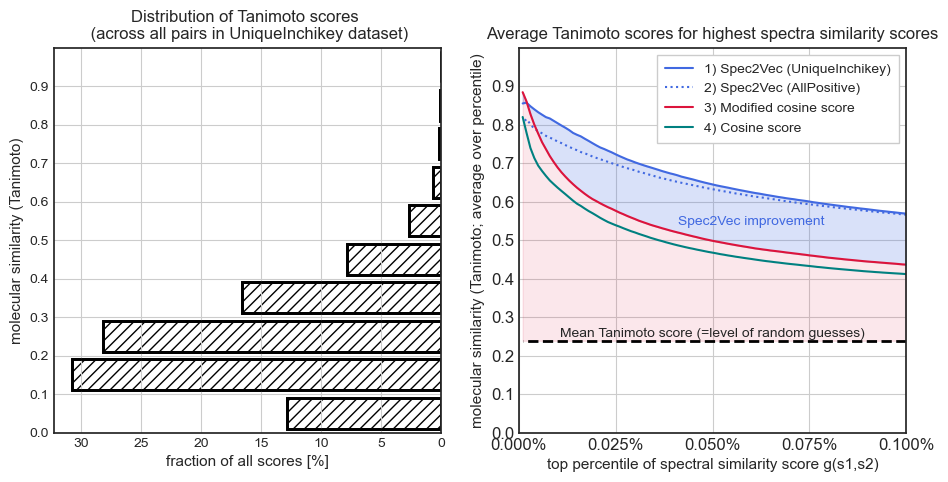

In [191]:
#def plot_histogram(hist, bin_edges, figsize=(6,6)):

figsize = (11,5)
label_fontsize = 11

n_bins = bin_edges.shape[0] -1
bins_lst = np.linspace(0, 1, n_bins+1)
delta_bin = bin_edges[1] - bin_edges[0]

plt.style.use('seaborn-white') #('ggplot')
plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=figsize)
#fig, ax1 = plt.subplots(1,1)
bar_width = 0.8 * 1/n_bins
ax1.barh(bin_edges[:-1]+delta_bin/2, 100*hist/np.sum(hist), height = bar_width, color='none',
         edgecolor='black', hatch="///", lw=2., zorder = 0)
ax1.barh(bin_edges[:-1]+delta_bin/2, 100*hist/np.sum(hist), height = bar_width,
         edgecolor='black', linewidth=2, color='none',alpha=1)

maxbar = np.max(100*hist/np.sum(hist))
plt.xticks(10*np.arange(np.ceil(maxbar/10)), ["{}".format(10*x) for x in np.arange(np.ceil(maxbar/10))],
           fontsize=12)

bar_labels = ['{:03.1f}'.format(bins_lst[i]) for i in range(n_bins)]
plt.yticks(bins_lst[:-1], bar_labels, fontsize=12)
ax1.set_ylabel('molecular similarity (Tanimoto)', fontsize=label_fontsize)
ax1.set_xlabel('fraction of all scores [%]', fontsize=label_fontsize)
plt.setp(ax.spines.values(), linewidth=3, color="black")
ax1.grid(True)
ax1.set_xlim((1.05 * max(100*hist/np.sum(hist)), 0))

#Plot 2
num_bins = 100
show_top_percentile = 0.1

x_percentiles = (show_top_percentile / num_bins * (1 + np.arange(num_bins)))[::-1]

ax2.plot(x_percentiles, percentile_spec2vec_2dec_iter_50, 
         color='royalblue',
         label='1) Spec2Vec (UniqueInchikey)')
ax2.fill_between(x_percentiles, percentile_spec2vec_2dec_iter_50, percentile_mod_cosine_tol0005,
                 color='royalblue', alpha=0.2)

ax2.plot(x_percentiles, percentiles_AllPosModel, 
         ":", color='royalblue',
         label='2) Spec2Vec (AllPositive)')

ax2.plot(x_percentiles, percentile_mod_cosine_tol0005, 
         color='crimson',
         label='3) Modified cosine score')
ax2.fill_between(x_percentiles, len(x_percentiles) * [tanimoto_mean], percentile_mod_cosine_tol0005,
                 color='crimson', alpha=0.1, zorder = 1)


ax2.plot(x_percentiles, percentile_cosine_tol0005, 
         color='teal', #'gold',
         label='4) Cosine score')
#ax2.fill_between(x_percentiles, percentile_cosine_tol0005, color='teal', alpha=0.1)

ax2.plot(x_percentiles, len(x_percentiles) * [tanimoto_mean], "--", color='black', linewidth=2,
        )#label='5) Mean Tanimoto score (=level of random guesses)')
#ax2.fill_between(x_percentiles, len(x_percentiles) * [tanimoto_mean], color='royalblue', alpha=0.1)

ax2.set_ylabel("molecular similarity (Tanimoto; average over percentile)", fontsize=label_fontsize)
ax2.set_xlabel("top percentile of spectral similarity score g(s1,s2)", fontsize=label_fontsize)
ax2.set_xlim((0, show_top_percentile))

# Add extra text
ax2.text(0.05, 0.25, "Mean Tanimoto score (=level of random guesses)", horizontalalignment='center')
ax2.text(0.06, 0.54, "Spec2Vec improvement",
         horizontalalignment='center', color="royalblue")

ax1.title.set_text('Distribution of Tanimoto scores \n (across all pairs in UniqueInchikey dataset)')
ax2.title.set_text('Average Tanimoto scores for highest spectra similarity scores')
ax2.yaxis.set_tick_params(labelbottom=True)
plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.xticks(np.arange(0, 0.11, step=0.02), ('0.00%', '0.02%', '0.04%', '0.06%', '0.08%', '0.10%'))
plt.xticks(np.linspace(0, show_top_percentile, 5),
           ["{:.3f}%".format(x) for x in np.linspace(0, show_top_percentile, 5)], fontsize=12)
plt.grid(True)
legend = ax2.legend(fancybox=False, framealpha=1, shadow=False, borderpad=0.6, frameon=True)
plt.ylim((0,1))

plt.savefig("new_benachmark_plot.svg")